#### Архітектура - Семантичний пошук з використанням еластичного пошуку


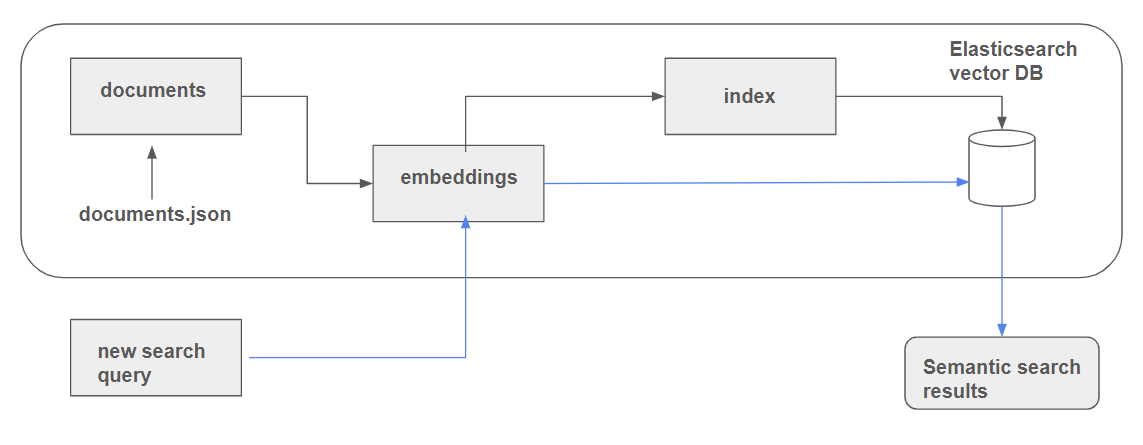

* Два дуже важливих поняття в Elasticsearch - це документи та індекси.

* Документ - це набір полів з пов'язаними з ними значеннями. 

* Щоб працювати з Elasticsearch, ви повинні організувати свої дані в документи, а потім додати всі ваші документи до індексу. 

* Індекс як колекція документів, що зберігається у високооптимізованому форматі, призначеному для здійснення ефективного пошуку.

#### Крок 1: Підготуйте документи

In [1]:
import json

with open('documents.json', 'rt') as f_in:
    docs_raw = json.load(f_in)

In [2]:
documents = []

for course_dict in docs_raw:
    for doc in course_dict['documents']:
        doc['course'] = course_dict['course']
        documents.append(doc)

documents[1]

{'text': 'GitHub - DataTalksClub data-engineering-zoomcamp#prerequisites',
 'section': 'General course-related questions',
 'question': 'Course - What are the prerequisites for this course?',
 'course': 'data-engineering-zoomcamp'}

#### Крок 2: Створення Embeddings за допомогою попередньо навчених моделей

Sentence Transformers documentation here: https://www.sbert.net/docs/sentence_transformer/pretrained_models.html

In [3]:
# This is a new library compared to the previous modules. 
# Please perform "pip install sentence_transformers==2.7.0"
from sentence_transformers import SentenceTransformer

# if you get an error do the following:
# 1. Uninstall numpy 
# 2. Uninstall torch
# 3. pip install numpy==1.26.4
# 4. pip install torch
# run the above cell, it should work
model = SentenceTransformer("all-mpnet-base-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Error while downloading from https://cdn-lfs.huggingface.co/sentence-transformers/all-mpnet-base-v2/78c0197b6159d92658e319bc1d72e4c73a9a03dd03815e70e555c5ef05615658?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27model.safetensors%3B+filename%3D%22model.safetensors%22%3B&Expires=1720954370&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcyMDk1NDM3MH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9zZW50ZW5jZS10cmFuc2Zvcm1lcnMvYWxsLW1wbmV0LWJhc2UtdjIvNzhjMDE5N2I2MTU5ZDkyNjU4ZTMxOWJjMWQ3MmU0YzczYTlhMDNkZDAzODE1ZTcwZTU1NWM1ZWYwNTYxNTY1OD9yZXNwb25zZS1jb250ZW50LWRpc3Bvc2l0aW9uPSoifV19&Signature=ev00wt9VbGsfAG5-3f6%7ER9k0u%7E0KvXijrpl%7ENRfadfIFt7nBCUx%7ENK7USNZpyEiT0tlGYPGCle0-UlRuQSHsQ6FwRqYdHcsQa7dMg3F-uAezoix134Ax8IknmylqJnqy9sabKkXcL0b9oW0PlD8nepYznQ4ksxDKwVScichbkoDD99yGro8YRmc4O-fXJn4W7fwgmeDbo4okT9hgfikXK5FOd%7EF8zSUQ4q6sSLhXp2axJpJ-CE2QMM68JiFog9wnyuO%7ELButO3PGcmA%7EuZ4S9Ftr6Rm3kJRMirZD7lYyEqt0grtgFJ7vDmPZCS2fOqzjcmM

model.safetensors:  19%|#9        | 83.9M/438M [00:00<?, ?B/s]

Error while downloading from https://cdn-lfs.huggingface.co/sentence-transformers/all-mpnet-base-v2/78c0197b6159d92658e319bc1d72e4c73a9a03dd03815e70e555c5ef05615658?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27model.safetensors%3B+filename%3D%22model.safetensors%22%3B&Expires=1720954370&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcyMDk1NDM3MH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9zZW50ZW5jZS10cmFuc2Zvcm1lcnMvYWxsLW1wbmV0LWJhc2UtdjIvNzhjMDE5N2I2MTU5ZDkyNjU4ZTMxOWJjMWQ3MmU0YzczYTlhMDNkZDAzODE1ZTcwZTU1NWM1ZWYwNTYxNTY1OD9yZXNwb25zZS1jb250ZW50LWRpc3Bvc2l0aW9uPSoifV19&Signature=ev00wt9VbGsfAG5-3f6%7ER9k0u%7E0KvXijrpl%7ENRfadfIFt7nBCUx%7ENK7USNZpyEiT0tlGYPGCle0-UlRuQSHsQ6FwRqYdHcsQa7dMg3F-uAezoix134Ax8IknmylqJnqy9sabKkXcL0b9oW0PlD8nepYznQ4ksxDKwVScichbkoDD99yGro8YRmc4O-fXJn4W7fwgmeDbo4okT9hgfikXK5FOd%7EF8zSUQ4q6sSLhXp2axJpJ-CE2QMM68JiFog9wnyuO%7ELButO3PGcmA%7EuZ4S9Ftr6Rm3kJRMirZD7lYyEqt0grtgFJ7vDmPZCS2fOqzjcmM

model.safetensors:  22%|##1       | 94.4M/438M [00:00<?, ?B/s]

Error while downloading from https://cdn-lfs.huggingface.co/sentence-transformers/all-mpnet-base-v2/78c0197b6159d92658e319bc1d72e4c73a9a03dd03815e70e555c5ef05615658?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27model.safetensors%3B+filename%3D%22model.safetensors%22%3B&Expires=1720954370&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcyMDk1NDM3MH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9zZW50ZW5jZS10cmFuc2Zvcm1lcnMvYWxsLW1wbmV0LWJhc2UtdjIvNzhjMDE5N2I2MTU5ZDkyNjU4ZTMxOWJjMWQ3MmU0YzczYTlhMDNkZDAzODE1ZTcwZTU1NWM1ZWYwNTYxNTY1OD9yZXNwb25zZS1jb250ZW50LWRpc3Bvc2l0aW9uPSoifV19&Signature=ev00wt9VbGsfAG5-3f6%7ER9k0u%7E0KvXijrpl%7ENRfadfIFt7nBCUx%7ENK7USNZpyEiT0tlGYPGCle0-UlRuQSHsQ6FwRqYdHcsQa7dMg3F-uAezoix134Ax8IknmylqJnqy9sabKkXcL0b9oW0PlD8nepYznQ4ksxDKwVScichbkoDD99yGro8YRmc4O-fXJn4W7fwgmeDbo4okT9hgfikXK5FOd%7EF8zSUQ4q6sSLhXp2axJpJ-CE2QMM68JiFog9wnyuO%7ELButO3PGcmA%7EuZ4S9Ftr6Rm3kJRMirZD7lYyEqt0grtgFJ7vDmPZCS2fOqzjcmM

ConnectionError: (MaxRetryError('HTTPSConnectionPool(host=\'cdn-lfs.huggingface.co\', port=443): Max retries exceeded with url: /sentence-transformers/all-mpnet-base-v2/78c0197b6159d92658e319bc1d72e4c73a9a03dd03815e70e555c5ef05615658?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27model.safetensors%3B+filename%3D%22model.safetensors%22%3B&Expires=1720954370&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcyMDk1NDM3MH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9zZW50ZW5jZS10cmFuc2Zvcm1lcnMvYWxsLW1wbmV0LWJhc2UtdjIvNzhjMDE5N2I2MTU5ZDkyNjU4ZTMxOWJjMWQ3MmU0YzczYTlhMDNkZDAzODE1ZTcwZTU1NWM1ZWYwNTYxNTY1OD9yZXNwb25zZS1jb250ZW50LWRpc3Bvc2l0aW9uPSoifV19&Signature=ev00wt9VbGsfAG5-3f6~R9k0u~0KvXijrpl~NRfadfIFt7nBCUx~NK7USNZpyEiT0tlGYPGCle0-UlRuQSHsQ6FwRqYdHcsQa7dMg3F-uAezoix134Ax8IknmylqJnqy9sabKkXcL0b9oW0PlD8nepYznQ4ksxDKwVScichbkoDD99yGro8YRmc4O-fXJn4W7fwgmeDbo4okT9hgfikXK5FOd~F8zSUQ4q6sSLhXp2axJpJ-CE2QMM68JiFog9wnyuO~LButO3PGcmA~uZ4S9Ftr6Rm3kJRMirZD7lYyEqt0grtgFJ7vDmPZCS2fOqzjcmMhEPnR8jNiWhdxbk5rzA__&Key-Pair-Id=K3ESJI6DHPFC7 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001C439275590>: Failed to resolve \'cdn-lfs.huggingface.co\' ([Errno 11001] getaddrinfo failed)"))'), '(Request ID: 89b84258-0547-47ea-b8f8-3055c2798b39)')

In [ ]:
model.save("./model/all-mpnet-base-v2")

In [6]:
len(model.encode("This is a simple sentence"))

768

In [9]:
documents[1]

{'text': 'GitHub - DataTalksClub data-engineering-zoomcamp#prerequisites',
 'section': 'General course-related questions',
 'question': 'Course - What are the prerequisites for this course?',
 'course': 'data-engineering-zoomcamp'}

In [10]:
#created the dense vector using the pre-trained model
operations = []
for doc in documents:
    # Transforming the title into an embedding using the model
    doc["text_vector"] = model.encode(doc["text"]).tolist()
    operations.append(doc)

#### Step 3: Setup ElasticSearch connection 

In [12]:
from elasticsearch import Elasticsearch
es_client = Elasticsearch('http://localhost:9200') 

es_client.info()

ObjectApiResponse({'name': 'c89345ae8aca', 'cluster_name': 'docker-cluster', 'cluster_uuid': 'Uj1CMXaIR3-EqjEuEXx5Yw', 'version': {'number': '8.4.3', 'build_flavor': 'default', 'build_type': 'docker', 'build_hash': '42f05b9372a9a4a470db3b52817899b99a76ee73', 'build_date': '2022-10-04T07:17:24.662462378Z', 'build_snapshot': False, 'lucene_version': '9.3.0', 'minimum_wire_compatibility_version': '7.17.0', 'minimum_index_compatibility_version': '7.0.0'}, 'tagline': 'You Know, for Search'})

#### Крок 4: Створіть зіставлення та індекс

* Мапування - це процес визначення способу зберігання та індексування документа та полів, що в ньому містяться.

* Кожен документ являє собою набір полів, кожне з яких має свій тип даних.

* Ми можемо порівняти мапування зі схемою бази даних у тому, як вона описує поля та властивості документів, тип даних кожного поля (наприклад, рядок, ціле число або дата), а також те, як ці поля мають бути проіндексовані та збережені. 



In [13]:
index_settings = {
    "settings": {
        "number_of_shards": 1,
        "number_of_replicas": 0
    },
    "mappings": {
        "properties": {
            "text": {"type": "text"},
            "section": {"type": "text"},
            "question": {"type": "text"},
            "course": {"type": "keyword"} ,
            "text_vector": {"type": "dense_vector", "dims": 768, "index": True, "similarity": "cosine"},
        }
    }
}

In [14]:
index_name = "course-questions"

es_client.indices.delete(index=index_name, ignore_unavailable=True)
es_client.indices.create(index=index_name, body=index_settings)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'course-questions'})

#### Крок 5: Додайте документи до індексу

In [16]:
for doc in operations:
    try:
        es_client.index(index=index_name, document=doc)
    except Exception as e:
        print(e)

#### Крок 6: Створіть запит кінцевого користувача

In [17]:
search_term = "windows or mac?"
vector_search_term = model.encode(search_term)

In [18]:
query = {
    "field": "text_vector",
    "query_vector": vector_search_term,
    "k": 5,
    "num_candidates": 10000, 
}

In [19]:
res = es_client.search(index=index_name, knn=query, source=["text", "section", "question", "course"])
res["hits"]["hits"]

[{'_index': 'course-questions',
  '_id': '-BY3YZABY4SUV-QiWtCV',
  '_score': 0.7147919,
  '_source': {'question': 'Environment - Is the course [Windows/mac/Linux/...] friendly?',
   'course': 'data-engineering-zoomcamp',
   'section': 'General course-related questions',
   'text': 'Yes! Linux is ideal but technically it should not matter. Students last year used all 3 OSes successfully'}},
 {'_index': 'course-questions',
  '_id': 'CxY4YZABY4SUV-QiNdSb',
  '_score': 0.6134734,
  '_source': {'question': 'WSL instructions',
   'course': 'mlops-zoomcamp',
   'section': 'Module 1: Introduction',
   'text': 'If you wish to use WSL on your windows machine, here are the setup instructions:\nCommand: Sudo apt install wget\nGet Anaconda download address here. wget <download address>\nTurn on Docker Desktop WFree Download | AnacondaSL2\nCommand: git clone <github repository address>\nVSCODE on WSL\nJupyter: pip3 install jupyter\nAdded by Gregory Morris (gwm1980@gmail.com)\nAll in all softwares at

#### Крок 7: Виконайте пошук за ключовими словами за допомогою семантичного пошуку (гібридний/розширений пошук)

In [ ]:
# Примітка: Я зробив невелику модифікацію запиту, показаного в блокноті тут
# (порівняйте з тим, що показано у відео)
# Включили "knn" у пошуковий запит (для виконання семантичного пошуку) разом з фільтром
knn_query = {
    "field": "text_vector",
    "query_vector": vector_search_term,
    "k": 5,
    "num_candidates": 10000
}

In [ ]:
response = es_client.search(
    index=index_name,
    query={
        "match": {"section": "General course-related questions"},
    },
    knn=knn_query,
    size=5
)

In [ ]:
response["hits"]["hits"]

#### References

1. https://logz.io/blog/elasticsearch-mapping/#:~:text=Within%20a%20search%20engine%2C%20mapping,indexes%20and%20stores%20its%20fields

2. https://www.sbert.net/docs/sentence_transformer/pretrained_models.html

3. https://www.elastic.co/search-labs/tutorials

4. https://www.elastic.co/search-labs/blog/text-similarity-search-with-vectors-in-elasticsearch